In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout

from local_dataset import load_minst

import matplotlib.pyplot as plt

In [2]:
img_size = 20

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_minst(img_size=img_size, label_encode=True)

No image flattening.
Label converted by One Hot Encoder.


In [4]:
x_train = x_train_original.reshape(-1, img_size, img_size)
x_test = x_test_original.reshape(-1, img_size, img_size)

y_train = y_train_original
y_test = y_test_original

In [5]:
# dataset shapes
print('Train data shape:', np.shape(x_train))
print('Test  data shape:', np.shape(x_test))

print('Train label shape:', np.shape(y_train))
print('Test  label shape:', np.shape(y_test))

Train data shape: (60000, 20, 20)
Test  data shape: (10000, 20, 20)
Train label shape: (60000, 10)
Test  label shape: (10000, 10)


## Model

In [6]:
x = keras.Input(shape=(10, 64))
y = keras.layers.Flatten()(x)
y.shape

(None, 640)

In [7]:
# Create model architectue
model = Sequential()
# may leave flatten layer with no input shape, and model summary available after first run
# model.add(Flatten()) 
model.add(Flatten(input_shape=(img_size, img_size))) 
model.add(Dense(60, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 60)                  │          24,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │          18,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,370 (177.23 KB)

 Trainable params: 45,370 (177.23 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile Model
model.compile( optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
%%time
# Fit (learn) model
history= model.fit(x=x_train,
                   y=y_train,
                   # batch_size=64,
                   epochs=10,
                   validation_split=0.2
                  )

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8463 - loss: 0.5308 - val_accuracy: 0.9381 - val_loss: 0.2084
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9514 - loss: 0.1578 - val_accuracy: 0.9559 - val_loss: 0.1565
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1116 - val_accuracy: 0.9672 - val_loss: 0.1157
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0890 - val_accuracy: 0.9644 - val_loss: 0.1267
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0748 - val_accuracy: 0.9692 - val_loss: 0.1168
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0647 - val_accuracy: 0.9701 - val_loss: 0.1109
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0557 - val_accuracy: 0.9712 - val_loss: 0.1136
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0547 - 

In [11]:
print(f'Max train accuracy: {max(history.history["accuracy"]):,.2f}')
print(f'Min train loss: {min(history.history["loss"]):,.2f}')

Max train accuracy: 0.99
Min train loss: 0.05


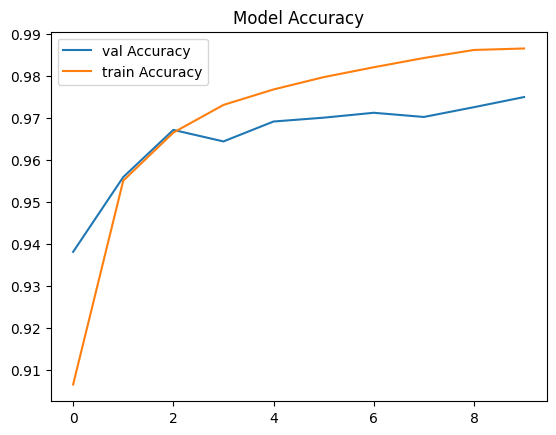

In [12]:
plt.title("Model Accuracy")
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val Accuracy', 'train Accuracy'])

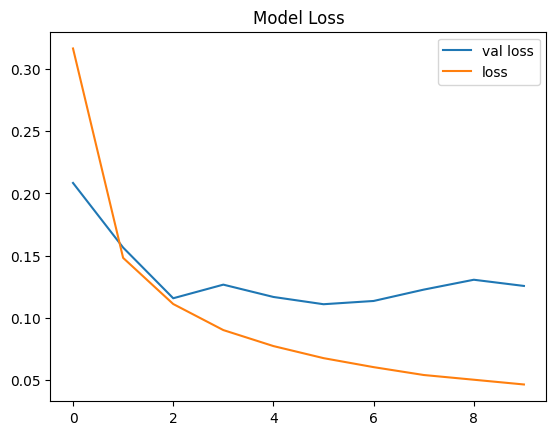

In [13]:
plt.title("Model Loss")
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val loss', 'loss'])

---------------------
## Dropout layer
**Use to reduce overfit and more generalize model.**
<br/><br/>
**NOTE:**
* 1- usually add dropout to fully connected layes.
* 2- The more we go to the end layers of the network, the dropout rate increase. Because in these layers, the features become more high level.
* 3- Features at first layer are more simple and low level, so they use more by network to be trained. Its prefere to use less dropout rate.

In [21]:
model_dropout = Sequential()
# may leave flatten layer with no input shape, and model summary available after first run
# model.add(Flatten()) 
model_dropout.add(Flatten(input_shape=(img_size, img_size))) 
model_dropout.add(Dense(60, activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(300, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(10, activation='softmax'))

In [22]:
model_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │          24,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 300)                 │          18,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,370 (177.23 KB)

 Trainable params: 45,370 (177.23 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile Model
model_dropout.compile( optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [24]:
%%time
# Fit (learn) model
history_dropout= model_dropout.fit(x=x_train,    
                           y=y_train,      
                           batch_size=64,      
                           epochs=10,            
                           validation_split=0.2
                          )

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7795 - loss: 0.7362 - val_accuracy: 0.9406 - val_loss: 0.1963
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9339 - loss: 0.2177 - val_accuracy: 0.9537 - val_loss: 0.1546
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9493 - loss: 0.1645 - val_accuracy: 0.9605 - val_loss: 0.1305
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9582 - loss: 0.1407 - val_accuracy: 0.9665 - val_loss: 0.1187
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9610 - loss: 0.1304 - val_accuracy: 0.9679 - val_loss: 0.1143
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1182 - val_accuracy: 0.9703 - val_loss: 0.1138
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.1080 - val_accuracy: 0.9719 - val_loss: 0.1085
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9707 - loss: 0.0986 - val_accuracy: 0.

****

**It is expected to see model improvement in accuracy and loss.**

In [25]:
print(f'Max train accuracy: {max(history.history["accuracy"]):,.2f}')
print(f'Min train loss: {min(history.history["loss"]):,.2f}')
print()
print(f'Max train accuracy: {max(history_dropout.history["accuracy"]):,.2f}')
print(f'Min train loss: {min(history_dropout.history["loss"]):,.2f}')

Max train accuracy: 0.99
Min train loss: 0.05

Max train accuracy: 0.97
Min train loss: 0.09


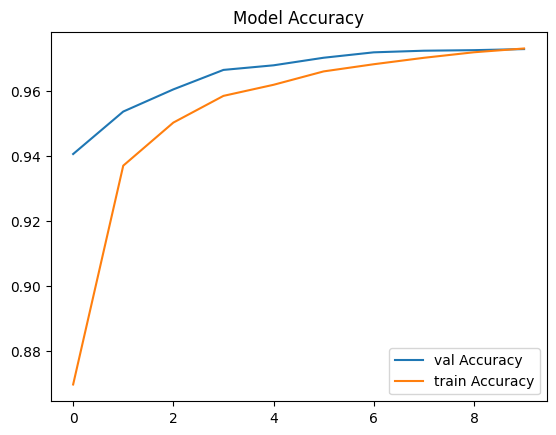

In [26]:
plt.title("Model Accuracy")
plt.plot(history_dropout.history['val_accuracy'])
plt.plot(history_dropout.history['accuracy'])
plt.legend(['val Accuracy', 'train Accuracy'])

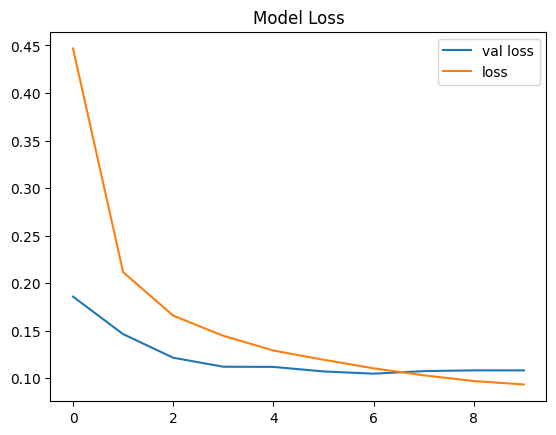

In [20]:
plt.title("Model Loss")
plt.plot(history_dropout.history['val_loss'])
plt.plot(history_dropout.history['loss'])
plt.legend(['val loss', 'loss'])